---

## Project Instruction

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service), for instance you could store your work on GitLab. You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- Make sure your code is readable, organised, and commented appropriately.


## Team working 

Firstly agree amongst yourself how you are to work together as a group. 
- When will you meet? or will you work remotely from each other?
- How are you going to share code?
- How will you divide tasks?
- Who will present the final notebook, who will upload?
- When are you planning to work on the project?

The following tasks are all open-ended, so you should plan to work on them and investigate the problems raised and think about what you wish to cover. Because the task is open-ended you don't need to talk about every aspect of the problem to get a good mark - you should aim to present a coherent and well coded investigation into some aspects of each task though. The listed questions are a guide to some things you could think about to get you started, you don't need to answer them all, and you can certainly answer questions that are not listed.

When you are presenting your investigation of each problem, be sure to make a coherent discussion for each task (using markdown, maths as appropriate and code cells). In particular, since you are working as a group some work will be needed to make a single written response to the task combining all of the code and writing that you each contribute - this is something that you should plan to do and the quality of presentation will be marked.

## Task 1 - Analysing the product reviews

In this project, you are supposed to analyse product reviews and extract helpful information from them. The case we are studying here is the review dataset of women’s clothes that are sold by a company online. In the file `WomensApparelReviews.csv`, you are given over 23000 reviews that are real but anonymized. The columns of this dataset are the following variables:


**Product ID**: integer variable that refers to the specific item that is reviewed.

**Age**: the reviewers age.

**Title**: the title picked by the reviewer (some reviewers didn't pick any titles).

**Review Text**: the body text of the review.

**Rating**: the product score given by the customer from 1 (worst), to 5 (best).

**Is it Recommended?**: the customers are asked whether or not they recommend the product. 1 means the product is recommended, 0 means not recommended.

**Department**: the products are classified in different departments such as dress, top and ...

A major part of this task is analysing the review text and deciding how positive or negative it is. To that end, there are two more data files: `positive-words.txt` and `negative-words.txt`, which contain lists of positive and negative words, respectively. These words come from the paper by *Minqing Hu and Bing Liu. "Mining and summarizing customer reviews." Proceedings of the ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, Seattle, Washington, USA, Aug 22-25, 2004*. You will need to invent a metric for how positive or negative "Review Text" is, based on how many of the words in it are in the positive/negative word lists. For instance, is a review containing one positive and one negative word: overall positive, negative or neutral? - try and develop a single measure based on the word occurrences that will describe the positivity/negativity of the review. You can also decide if a "Title" is positive, negative or neutral by searching for them in the lists of positive and negative words. Once you have developed one positivity/negativity measure can you think of other measures that you could compare?

This project is open-ended, so you can come up with your own ideas to analyse the dataset and extract useful information or interesting facts. However at least one of the ideas you present should make use of the positive and negative word lists for analysing the reviews text. Here are some questions you might address in your analysis (of course you are not limited to just these questions):

- What is the age distribution of customers?
- What is the most popular item in each age group? (you can classify the ages however you think appropriate - be sure to justify what you do).
- Using the measure of negativity or positivity that you define, rate the reviews. You can also decide whether a title is positive or negative. Are the negativity-positivity of the titles and that of the review texts correlated? 
- What is the average rating in positive, negative or neutral reviews?
- Is the rating correlated to your measure of negativity-positivity? 
- Are there many outliers who wrote a negative text but left a high rating (or vice versa)?
- Which product attracted the most positive reviews? This would help the company to focus more on the product that people liked or make changes to the product that people did not like. Is there any such advice you could give them on the products that could come from the reviews?
- What is the most recommended product? What is the least recommended product?
- Which group of reviewers wrote a longer text in their review? Do unhappy customers write longer reviews or satisfied customers? 
- Which age group uses more positive words? Which age group uses more negative words?
- Are older people more inclined to recommend a product or younger people?
- Is it true that unhappy customers use more capital letters? or it is the other way around?
- Can you come up with a way to consider the positive words in a negative statement negative? For example, "Not impressed or satisfied" is a negative title, but if you just count the positive and negative words, you will find two positive words ("impressed" and "satisfied") and a negative word ("not"). Hence, just based on the word count, you might wrongly find the title to be positive. This might be easier for the titles, but you can also break down the review text to sentences and apply your method there.


In [1]:
# First import the modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re  
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [60]:
#importing WomensApparelReviews.csv in notebook 
# the csv file:
df = pd.read_csv('WomensApparelReviews.csv', encoding="latin8")


### What is the age distribution of customers?

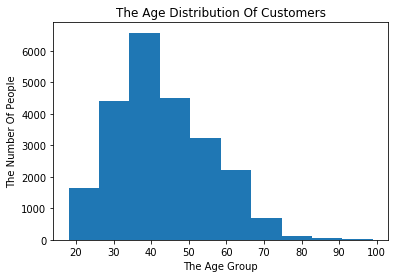

In [4]:
#What is the age distribution of customers?
data_age=df['Age']
plt.hist(data_age)
plt.title("The Age Distribution Of Customers")
plt.xlabel('The Age Group')
plt.ylabel('The Number Of People')
plt.show()

### Age distribution of customers

From this graph, we will see that the number of people most people around 40.

### What is the most popular item in each age group?


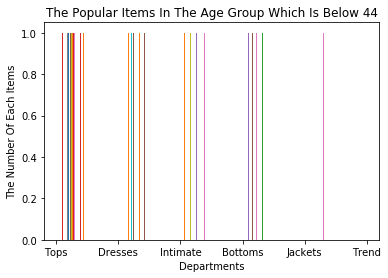

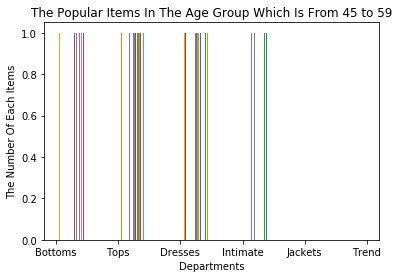

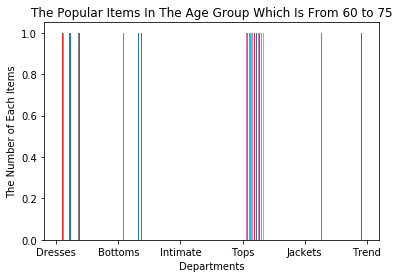

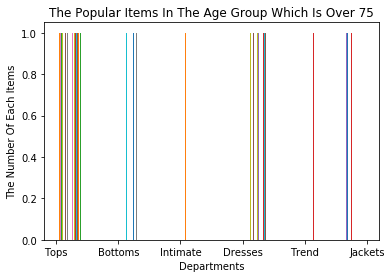

In [5]:
#What is the most popular item in each age group?

# NaN dropped:
dq2=df.dropna(how='any')

#from the UN World Health Organization we have a new age range:
#young people under 44 years old
d_young=dq2.loc[(dq2['Age']<=44),'Department']

plt.hist(d_young)
plt.title("The Popular Items In The Age Group Which Is Below 44")

plt.xlabel('Departments')
plt.ylabel('The Number Of Each Items')
plt.show()

#middle-aged people between 45 and 59 years old
d_middle=dq2.loc[(dq2['Age']>=45)&(dq2['Age']<=59),'Department']

plt.hist(d_middle)
plt.title("The Popular Items In The Age Group Which Is From 45 to 59")
plt.xlabel('Departments')
plt.ylabel('The Number Of Each Items')
plt.show()

#old people between 60 and 75 years old
d_old=dq2.loc[(dq2['Age']>=60)&(dq2['Age']<=75),'Department']

plt.hist(d_old)
plt.title("The Popular Items In The Age Group Which Is From 60 to 75")
plt.xlabel('Departments')
plt.ylabel('The Number of Each Items')
plt.show()

#and long-lived people over 75 years old.
d_long=dq2.loc[(dq2['Age']>=76),'Department']

plt.hist(d_long)
plt.title("The Popular Items In The Age Group Which Is Over 75")
plt.xlabel('Departments')
plt.ylabel('The Number Of Each Items')
plt.show()


### Most popular item in each age group
From the otcomes above, we will find that in each age group, the tops are always the most popular item, followed by dresses and then bottoms. So every age group picks similar items.

### Using a measure of negativity or positivity that you define, rate the reviews.


In [132]:
import string

#Using the measure of negativity or positivity that you define, rate the reviews. 
d_measure=df[['Title','Review Text']].copy()



#clean d_measure ,such as change upper words into lower words and so on.
d_measure.loc[:,'Title']= d_measure['Title'].str.lower()
d_measure.loc[:,'Review Text']= d_measure['Review Text'].str.lower()
string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
d_measure.loc[:,'Title']= d_measure['Title'].str.replace(r'[^\w\s]+','')
d_measure.loc[:,'Review Text']= d_measure['Review Text'].str.replace(r'[^\w\s]+','')

d_measure['Review Text']

#open negative-words.txt and positive-words.txt
with open('positive-words.txt', 'r') as f:  
    positive_words= f.readlines()
with open('negative-words.txt', 'r') as g:
    negative_words = g.readlines()
positive_words1 = positive_words.copy()
negative_words1 = negative_words.copy()
# only have words for evaluation positive_words1/negative_words1

for i in range (35):
    positive_words1.remove(positive_words[i])
    negative_words1.remove(negative_words[i])
# delete blanks at the right of words
for i in range (len(positive_words1)):
    positive_words1[i] = positive_words1[i].rstrip()
for i in range (len(negative_words1)):
    negative_words1[i] = negative_words1[i].rstrip()
x=d_measure['Review Text'].tolist()

# the number of positive words
def count_pos(x):
    """Count the positive words in a string and return the number of positive words.
    The x must be a string,or it will be wrong.
    >>>x=2
    count_pos(x)
    AttributeError: 'int' object has no attribute 'split'
    >>>x='happy thank sad bad diffcult excellent'
    count_pos(x)
    Output:3     
    """ 
    pos_num = 0
    for i in x.split()  :
        if i in positive_words1 :
            pos_num += 1 
    return pos_num

# the number of negative words
def count_neg(x):
    """Calculate the positive words in a string and return the number of positive words.
    The x must be a string,or it will be wrong."""
    neg_num = 0
    for i in x.split()  :
        if i in negative_words1 :
            neg_num += 1 
    return neg_num


r=[]
v=d_measure.shape[0]
for i in range(v):
    if type(x[i])==str:
        n=count_pos(x[i])-count_neg(x[i])
        r.append(n)
    else:
        r.append(0)
d_measure = pd.DataFrame(columns=['rate'],data=r)
display(d_measure.head(10))
mean = d_measure["rate"].mean()

print("The average difference of positive and negative words: ", mean)

,rate
0,3
1,4
2,1
3,5
4,5
5,2
6,1
7,0
8,0
9,4


The average difference of positive and negative words:  3.235289108405007


### Rating the reviews
We see the difference in positive and negative reviews, and the average is posivite.

We take a closer look at the the ratings by grouping them by negative, neutral and positive reviews

In [67]:
#What is the average rating in positive, negative or neutral reviews?
df['rate']=d_measure
#the average rating in positive reviews
d_positive=df.loc[(df['rate']>=3),'Rating']
positiver=d_positive.mean()
print('The average rating in positive reviews is')
print(positiver)

#the average rating in negative reviews
d_negative=df.loc[(df['rate']<=-2),'Rating']
negativer=d_negative.mean()
print('The average rating in negative reviews is')
print(negativer)

#the average rating in neutral reviews
d_neutral=df.loc[(df['rate']<=2)&(df['rate']>=-1),'Rating']
neutralr=d_neutral.mean()
print('The average rating in neutral reviews is')
print(neutralr)

cor=(df['rate']).corr(df['Rating'])
print("\nThe correlation in our measure of reviews and in the given rating: %f" %cor)

The average rating in positive reviews is
4.453414372542009
The average rating in negative reviews is
2.788065843621399
The average rating in neutral reviews is
3.872656683305602

The correlation in our measure of reviews and in the given rating: 0.320234


### Average rating in three classes of reviews
In this question, we define that if the rate is above or equal to 3, the review is positive, if the rate is below or equal to -2, the review is negative and if the rate is between -1 and 2, the review is neutral.
The outcome is the average rating in these three kind of reviews.

We see a reasonable outcome in the average rating based on our measure of the reviews, and calculating the correlation of our measure and the rating given give us a medium correlation.

### Are there many outliers who wrote a negative text but left a high rating?


In [99]:
#Are there many outliers who wrote a negative text but left a high rating (or vice versa)?
d_neghighrate=df[(df["rate"]<-2) & (df['Rating']==5)]
#d_neghighrate=df.loc[(df['rate']<=-2)&(df['Rating']==5),'Review Text']
print('These are outliers who wrote a negative text but left a high rating. Here are some examples of these people\'s review text:')

pd.options.display.max_colwidth = 1000
display(d_neghighrate[["Review Text", "Rating"]].head(5))
outliers = d_neghighrate["Review Text"].size
print("Number of reviews outliers:",outliers )


These are outliers who wrote a negative text but left a high rating. Here are some examples of these people's review text:


,Review Text,Rating
338,"When i received this blouse, ai noticed that there were gold dots all over the blouse and they were very sticky. some of the fabric would stick to these dots. i thought it was because the weather was sticky and humid. however, after hanging on my closet door, the dots are still sticky. i do love the design and fabric so i will try not to let the sticky dots bother me.",5
1479,Love this design it puts a twist on a turtle neck sweater. the only problem i had is that the tie kept coming undone but if you do a double knot the problem is solved! wish i would have bought all the other colors.,5
6227,"Saw this in the store and had to have it after i tried it on. it's shape is unique, it's very ""floaty"" and looks awesome with skinny cropped jeans & chunky sandals. \r\rthe ""empire"" does hit across the breast line, not below. i thought it added to the different shape, & didn't look odd on me. i am 5'6"" so it might overwhelm a petite frame.",5
7716,"It's a sweatshirt that isn't typically sweatshirt looking. first, it's spacedye. then there's the hi-lo hem. it's mock neck and it's wide neck. sleeves are low and cocoon-y. it's oversize in looks but not overwhelming. i love that i can throw this on over jeans or leggings, step into a pair of flats or trainers, whip my hair up into a bun and head out without looking too sloppy.",5
8126,"So this is a pricey tee but i ordered it on sale?still pricey. i?m really surprised how much i ended up loving it and wearing it. ordered it in the light red, size xs and it has become my go to tank for the summer?i wear it every week. the armholes are a tab long on me so i wear a black sports bra underneath and it does peak through but not in a tacky way. if you don?t mind the price i would pick this up.",5


Number of reviews outliers: 20


We see there are 20 reviews with negative reviews according to our measure but leave a five star rating. We print five of these reviews and we see that all of them are fairly long might have more words that are considered negative despite the whole of the review being in a positive tone.

### Which product attracted the most positive reviews?

In [111]:
#Which product attracted the most positive reviews?
d_positiveproduct=df.loc[(df['rate']>=3),'Product ID']
a = d_positiveproduct.value_counts()
pd.options.display.max_colwidth = 1000
print(a.head(5))
display(df.loc[df['Product ID'] == 1078].head(3))



1078    594
862     543
1094    442
1081    364
872     351
Name: Product ID, dtype: int64


,Unnamed: 0,Product ID,Age,Title,Review Text,Rating,Is it Recommended?,Department,rate
69,69,1078,56,Great summer fabric!,"I really wanted this to work. alas, it had a strange fit for me. the straps would not stay up, and it had a weird fit under the breast. it worked standing up, but the minute i sat down it fell off my shoulders. the fabric was beautiful! and i loved that it had pockets.",3,0,Dresses,1
90,90,1078,51,Sweet flattering dress,"I love cute summer dresses and this one, especially because it is made out of linen, is unique. it is very well-made with a design that is quite flattering. i am 5 foot 6 and a little curvy with a 38 c bust and i got a size 10. it fits well although it is difficult to zip up because the material has no give. the perfect dress to wear to italy or france! now i just have to book my tickets!",4,1,Dresses,3
117,117,1078,32,NaN,"This is the perfect summer dress. it can be dressed up or down. the quality of the linen fabric is very nice. i'm 5'1"" and it hit right below my knees. i found it to run true to size. those with a smaller bust might want to go down a size, but the tie in the front can be adjusted. it's lovely.",5,1,Dresses,3


From above we can find product attracted the most positive reviews is the Product ID 1078, and there are 594 people like it, we print out a few example reviews of it aswell and se that people are very happy with it.

We also print out the five items with the most positive reviews and see that there is a pretty big gap from one to five in terms of number of reviews.

### What is the most recommended product? What is the least recommended product?

In [38]:
#What is the most recommended product? What is the least recommended product?
#Using the measure of negativity or positivity that you define, rate the reviews. 
d_measure=df[['Department','Rating']]
#calculate the average rate of Tops
d_measure1=d_measure[d_measure['Department']=='Tops']

#The different types of products
departments = ["Tops", "Dresses", "Intimate", "Bottoms", "Jackets", "Trend"]
maxAvg, minAvg = -10000, 10000,
smallest_product, biggest_product = "",""

#find the lowest and higest average recomended product
for d in departments:
    depart = d_measure[d_measure["Department"] == d]
    a=depart.shape[0]
    c=sum(depart['Rating']) / a
    if c > maxAvg:
        maxAvg=c
        biggest_product = d
    if c<minAvg:
        minAvg = c
        smallest_product = d
print('%s is the product with the highest rating' %(biggest_product))
print ("%s is the product with the lowest rating" %(smallest_product))


Bottoms is the product with the highest rating
Trend is the product with the lowest rating


We find the products with the lowest average rating and the product with the highest average rating. We see that bottoms has the highest average rating and trend has the lowest average rating. 

In terms of products we have seen that trends is sold the least and has lowest average rating so perhaps they should get rid of those items.

### Which group of reviewers wrote a longer text in their review?

In [117]:
#Which group of reviewers wrote a longer text in their review?
#Using the measure of negativity or positivity that you define, rate the reviews. 
d_measure=df[['Rating','Review Text']].copy()
#clean d_measure ,such as change upper words into lower words and so on.
import string
d_measure.loc[:,'Review Text']= d_measure['Review Text'].str.lower()
string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
d_measure['Review Text']= d_measure['Review Text'].str.replace(r'[^\w\s]+','')

dq2=d_measure.dropna(how='any')

#from the UN World Health Organization we have a new age range:
#young people under 44 years old
d_unhappy=dq2.loc[(dq2['Rating']<=3),'Review Text']
d_satisfied=dq2.loc[(dq2['Rating']>3),'Review Text']
#calculate the average words of two groups
total_unhappy=len(d_unhappy)
total_happy=len(d_satisfied)
x=d_unhappy.tolist()
y=d_satisfied.tolist()

k,l=0,0
for i in range(total_unhappy):
    k=k+len(x[i].split())
for j in range(total_happy):
    l=l+len(y[i].split())
average_unhappy=k/total_unhappy
average_satisfied=l/total_happy


print('Unhappy customers write reviews of average length %.3f'% average_unhappy)
print('Satisfied customers write reviews of average length %.3f' %average_satisfied)

Unhappy customers write reviews of average length 62.458
Satisfied customers write reviews of average length 31.000


We see that customers that write worse reviews write on average twice as much as satisfied customers. They are more inclined to give details on what they do not like.

### Which age group uses more positive words? Which age group uses more negative words?

In [63]:
import string

#Which age group uses more positive words? Which age group uses more negative words?
#Using the measure of negativity or positivity that you define, rate the reviews. 
d_measure=df[['Age','Review Text']].copy()
#clean d_measure ,such as change upper words into lower words and so on.
d_measure.loc[:,'Review Text']= d_measure['Review Text'].str.lower()
string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
d_measure['Review Text']= d_measure['Review Text'].str.replace(r'[^\w\s]+','')

dq2=d_measure.dropna(how='any')

#young people under 44 years old
d_young=dq2.loc[(dq2['Age']<=44),'Review Text']
#middle-aged people between 45 and 59 years old
d_middle=dq2.loc[(dq2['Age']>=45)&(dq2['Age']<=59),'Review Text']
#old people between 60 and 75 years old
d_old=dq2.loc[(dq2['Age']>=60)&(dq2['Age']<=75),'Review Text']
#and long-lived people over 75 years old.
d_long=dq2.loc[(dq2['Age']>=76),'Review Text']

#set the age groups in a list and their names
age_groups = [d_young, d_middle, d_old, d_long]
age_group_names = ["Young", "Middle age", "Old", "Long lived old"]
maxDif, maxage = -1000, ""
minDif, minage = -1000, ""

#Find the most number of positive and negative comments
for k in range(len(age_groups)): 
    length = len(age_groups[k])
    dif, dif2 = 0, 0 #store positive and negative review counts
    x=age_groups[k].tolist()
    for i in range(length):
        if type(x[i])==str: #Empty review are none tyoe and give error
            dif+=count_pos(x[i])
            dif2+=count_neg(x[i])
    dif = dif/length
    dif2 = dif2/length
    if dif>maxDif:
        maxDif = dif
        maxage = age_group_names[k]
    if dif2>minDif:
        minDif = dif2
        minage = age_group_names[k]
        
print('%s people write most positive words' %(maxage))
print('%s people write most negative words' %(minage))

Long lived old people write most positive words
Old people write most negative words


We an interesting result where long lived people over the age of 75 use the most positive words but people in the age range of 60-75 use the most amount of negative words.

### Are older people more inclined to recommend a product or younger people?

In [128]:
#Are older people more inclined to recommend a product or younger people?
d_young11=df.loc[(df['Age']<=49),'Is it Recommended?']
x=d_young11.value_counts()
d_old11=df.loc[(df['Age']>=50),'Is it Recommended?']
y=d_old11.value_counts()

#the percentage of young people who make recommend
young_per=100*x[1]/len(d_young11)
print('The percentage of young people who recommend is {0:.2f}%'.format(young_per))


#the percentage of old people who make recommend
old_per=100*y[1]/len(d_old11)
print('The percentage of old people who recommend is {0:.2f}% '.format(old_per) )


#compare the percentage of young people and old people who make recommends
if young_per>old_per:
    print('\nYounger people more inclined to recommend a product')
else:
    print('\nOlder people more inclined to recommend a product')

the percentage of young people who make recommend is 81.38%
the percentage of old people who make recommend is 84.36% 

Older people more inclined to recommend a product


In this question, we define the people who is below or equal to 49 is young, and the people who are older or equal to 50 is old, and we can find that older people are more inclined to recommend a product. From the outcomes, we can find that the percentage of young people who recommend is 81%, and the percentage of old people who make recommendations is 84%.
So we conclude that older people more inclined to recommend a product.

### Is it true that unhappy customers use more capital letters? or it is the other way around?

In [ ]:
import re
import string

#Is it true that unhappy customers use more capital letters? or it is the other way around?
#Using the measure of negativity or positivity that you define, rate the reviews. 
d_measure=df[['Rating','Review Text']]
#clean d_measure ,such as change upper words into lower words and so on.

string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
d_measure['Review Text']= d_measure['Review Text'].str.replace(r'[^\w\s]+','')

dq2=d_measure.dropna(how='any')


d_unhappy=dq2.loc[(dq2['Rating']<=3),'Review Text']
d_satisfied=dq2.loc[(dq2['Rating']>3),'Review Text']
#calculate the average number of bigchar of two groups
a=len(d_unhappy)
b=len(d_satisfied)
x=d_unhappy.tolist()
y=d_satisfied.tolist()

bigchar_unhappy=0
for i in range(len(x)):
    bigchar_unhappy=bigchar_unhappy+len(re.findall(r'[A-Z]',x[i]))
bigchar_unhappy=bigchar_unhappy/a
bigchar_satisfied=0
for i in range(len(y)):
    bigchar_satisfied=bigchar_satisfied+len(re.findall(r'[A-Z]',y[i]))
bigchar_satisfied=bigchar_satisfied/b
if bigchar_unhappy>bigchar_satisfied:
    print('unhappy customers use more capital letters')
else:
    print('satisfied customers use more capital letters')


We define that of the rating is bigger than 3, we think the customer is satisfied but if the rating is below or equal to 3, the customer is unhappy, and from the customer above, we can find that satisfied customers use more capital letters.

## Task 2 - Analysing transportation data

In this task, you should analysing the cycling trips in Edinburgh in September 2019 collected in `cyclingtrips_Sep2019.csv`. This dataset is kindly supplied for use by Edinburgh Cycle Hire under the [Open Government License (OGL) v3.0](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/). You can extend your analysis to other months by downloading data from [this link](https://edinburghcyclehire.com/open-data/historical). 

As a part of this task you should visualise some aspects of the data geographically on a map. There are several different libraries and packages that you can use for this purpose. Below, I walk you through the installation and the basic usage of **folium**, but you are welcome to use any other geographical visualisation tools like `googlemaps` and `gmplot`. You can also find more about the folium library [here](https://python-visualization.github.io/folium/) and implement more advanced features of it in your project.

First, you need to install the library before importing it. The following cell does it for you in `Noteable` or a regular `Jupyter Notebook`:
 

In [2]:
import sys
!{sys.executable} -m pip install folium

Once you installed folium, you should import it and give it a starting coordinate

In [3]:
import folium


def newmap():
    """Define a empty folium map"""
    m = folium.Map(
        location=[55.924550, -3.176920],
        zoom_start=15
    )
    return m

In the cell above, I gave the latitude and longitude of Murchison House as the starting location to folium. I also set the initial zoom to 15. You can change this coordinate as well as the zooming and observe the results. To display the map in a Jupyter notebook, you just need to ask for the object representation (simply typing `"m"` for the above map):

In [4]:
m = newmap()
m

I can mark the Murchison House on the map by a circle with `radius=50`

In [5]:
folium.CircleMarker(
    location=[55.924550, -3.176920],
    radius=50,
    color='blue',
    fill=True,
    fill_color='blue'
).add_to(m)

m

Using this tool, we want to visualise how busy the stations are as destinations or starting points of cycling trips. After dividing the cycling trips into morning and afternoon/evening trips, show how many of them end in or start from a particular station. You can do this by drawing a radius proportional to the number of trips. You can also separate the stations as destinations or starting points by drawing them on different maps or by colour-coding them.

Just like the first task, this is an open-ended problem. You can address the following or any other interesting questions about bike trips:

- What was the average journey time and distance of bike trips on weekdays? What about weekends?
- What was the most common time(s) of day for journeys to be undertaken?
- Which areas do you suggest for building the new stations based on your analysis?
- Can you visualise which stations were used mostly for shorter trips and which one for longer trips?
- Can you compare the statistics of different months in summer? Is there any remarkable difference between them?

There is more open data available for other cities - here is the link for the data on the similar bike hire scheme in London ([TFL open data](https://cycling.data.tfl.gov.uk)), and for New York [here](https://www.citibikenyc.com/system-data). You could also think about some of the issues involved in other cities and bike share schemes, and perform similar sorts of analyses or comparisons. For example:

- Do bike hire schemes share popular times of day?
- Can you trace the common commute patterns of different cities? Are there any commonalities of shape or structure to the patterns?
- How does the average rental time compare across different cities? How does that time change as the size of the city changes?

In [130]:
import pandas as pd

#import the data
cycle_data_sep = pd.read_csv("cyclingtrips_Sep2019.csv")
cycle_data_aug = pd.read_csv("cyclingtrips_Aug2019.csv")
cycle_data_jul = pd.read_csv("cyclingtrips_Jul2019.csv")
cycle_data_jun = pd.read_csv("cyclingtrips_Jun2019.csv")




### Use of stations in Edinburgh

We want to compare use of stations in the months June, July, August and September. We want to see which stations are the most busy, what time stations are busy and how it differs between months.
First we explore which stations are being used the most by marking them on a map with the size of the marker depending on how many bikes are rented. Then we look at what time of day the bikes are rented.

In [30]:
import numpy as np
import math
import datetime
import os
from datetime import datetime, timedelta
from folium import FeatureGroup, LayerControl, Map, Marker


def time_of_day(time):
    minute = time.time()
    noon = datetime(1000, 1,1, 1).time()
    if(minute<noon):
        return "Morning"
    else:
        return "Afternoon"

def map_start_locations(monthly_data,month,color):
    '''Marks starting locations on folium map with marker size based on number of rentals
    
    Input data for one month, name of the month and color to mark in on the map 
    Output Folium featuregroup that can be added as a layer to a map
    '''
    
    popup = folium.Popup() #For marking circles on map
    monthly_data['started_at'] =  pd.to_datetime(monthly_data['started_at']) #changes time to datetime format
 
    #collects longtitude and latitude into a single column
    monthly_data['Location'] = list(zip(monthly_data.start_station_latitude, monthly_data.start_station_longitude))
    #Create dictionary that associates station ids to coordinates
    stations = monthly_data[["start_station_name",  "start_station_latitude","start_station_longitude"]]
    stations_dict = stations.set_index("start_station_name").T.to_dict("list")
    
    feature_group = FeatureGroup(name=month) #A group to add as as a layer on a map
    
    #create seperate variables for unique locations and how often they appear
    f, u = pd.factorize(monthly_data.start_station_name.values)
    counts = np.bincount(f)

    
    keys = list(stations_dict) #get the names of all the stations in a list
    for i in range(len(u)):
        folium.CircleMarker(
                location=stations_dict[u[i]], #locations
                radius=int(math.ceil(counts[i] / 50)), #Size of marker decide by count of rented bikes
                color=color,
                fill=True,
                fill_color=color,
                popup= keys[i] #click on stations on the map to get their names
            ).add_to(feature_group)
    
    return feature_group

m = newmap()
#Add markers as layers to the map
map_start_locations(cycle_data_jun,"June", "red").add_to(m)
map_start_locations(cycle_data_jul, "July", "green").add_to(m)
map_start_locations(cycle_data_aug, "August", "purple").add_to(m)
map_start_locations(cycle_data_sep,"September", "blue").add_to(m)

LayerControl().add_to(m)


m

C:\Users\s1997003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: DataFrame columns are not unique, some columns will be omitted.


### Start locations compared

We can easily compare months with the ticks in the top right corner of the map. We visualize the number of bikes rented at stations by showing larger markers for busier stations. 

Comparing the three summer months we see that June and July are very similar with july being a little busier. The busiest stations are mostyle located in the cities center with a few busy stations out by the sea. We see a very noticeble change in August where there is a huge increase in the number of bikes rented. The city center becomes especially busy while some of the stations further out remain almost unchanged.

In September the use of stations is more balanced than in the summer months. We see the amount of bikes rented decrease greatly in the center but some of the outer stations see more use, namely those near university buildings. 

### Number of journeys

Next we want to take a closer look at the number of bikes rented and for how long they are rented and how that changes over the course of a day, how it's different over the week and how different months compare.

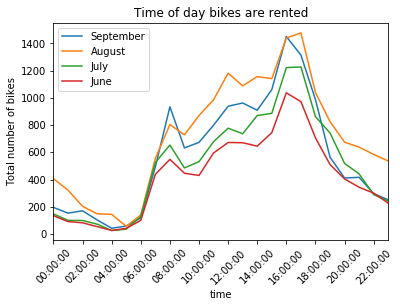

In [12]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta


def hour_rounder(t):
    '''Rounds to nearest hour by adding a timedelta hour if minute >= 30
    Input a datetime object t
    Output time value of t rounded to the nearest hour
    '''
    rounded_to_hour = (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +timedelta(hours=t.minute//30))
    return rounded_to_hour.time()

def month_journey_begins_edinburgh(all_data,legend):
    '''Make graph of number of bikes rented by time of day
    
    '''
    
    fig, ax = plt.subplots()
    #Add each months data to a graph
    for monthly_data in all_data:
        
        #Count the number of trips at each hour by rounding start time to the nearest hour
        rent_time = monthly_data[["started_at"]].copy()
        rent_time.loc[:,'started_at'] =  pd.to_datetime(rent_time.loc[:,'started_at']) #Change format to datetime
        #Round time to nearest hour
        rent_time.loc[:,'started_at'] = rent_time.loc[:,'started_at'].apply(lambda t: hour_rounder(t))
        values = rent_time.started_at.value_counts().sort_index() #Count frequency of values
        plt.plot(values)
        
    #Adjust title and axis style
    ax.set_xticks(values.index[::2])
    ax.set_xlim(values.index[0], values.index[-1])
    ax.set_xticklabels(values.index[::2], rotation=45)
    ax.set_ylabel("Total number of bikes")
    ax.set_title("Time of day bikes are rented")
    ax.legend(legend)

    plt.show()

month_journey_begins_edinburgh([cycle_data_sep, cycle_data_aug, cycle_data_jul, cycle_data_jun], ["September", "August", "July", "June"])



### Time of day

We see a similar that for all months the bikes are used at a similar time, with spikes in the afternoon and in the morning. The spikes are larger for september than any other month, especially the spike around 8 am. 

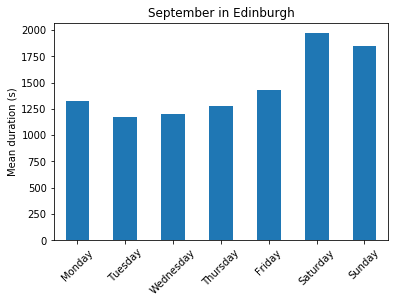

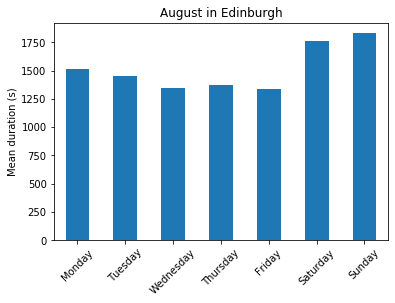

In [131]:
def duration_by_day(monthly_data, title):
    '''Bar plot by average length of trips grouped by day'''
    
    duration = monthly_data[["duration","started_at"]].copy() #data of duration and date
    #change date to datetime then to weekday
    duration.loc[:,'started_at'] =  pd.to_datetime(duration['started_at'])
    duration.loc[:,'started_at'] = duration['started_at'].apply(lambda t: t.weekday())

    avg_duration = duration.groupby('started_at').mean() # avg duration by weekday


    #make bar plot and style it
    ax = avg_duration.plot.bar(legend=False)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Mean duration (s)")
    ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=45)

duration_by_day(cycle_data_sep, "September in Edinburgh")
duration_by_day(cycle_data_aug, "August in Edinburgh")

### Comparing length of journeys  by weekdays

We start by looking at the duration of trips on different weekdays, we see that people take longer rides on the weekend, and the difference in time much greter in September than August. Presumably because people take longer rides on vacations and more people are on vacation in August.

In [34]:
import statistics

def mean_journey_duration(data, month):
    '''A function with input a months cycle data and outputs a map with a circle on station with radius
    proportional to the mean journey time entering that station.'''
    
    #First find the mean journey length to each station and store the new dataframe in variable mean_duration
    destination_duration = data[['duration', 'end_station_name',"end_station_latitude","end_station_longitude"]]
    #Find the mean duration of the journeys to each station
    mean_duration = destination_duration.groupby(['end_station_name']).mean()  
    #Create dictionary that associates mean journey times to that station to station coordinates
    destination_dict = mean_duration.set_index("duration").T.to_dict("list")    

    keys = list(destination_dict.keys())   #Create a list storing the keys of the dictionary created above
    
    feature_group = FeatureGroup(name=month)
    m = newmap()   #Initialise a new map
    
    for i in keys: #For each key which in this case is mean journey length
        rad = int(math.ceil(i / 500))   #Circle radius proportional to the key value      
        folium.CircleMarker(
            location=destination_dict[i],  #Location of the circle is the value of the key in the dictionary
            radius=rad,
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(feature_group)
    return feature_group


m = newmap()
mean_journey_duration(cycle_data_jun, 'June').add_to(m)
mean_journey_duration(cycle_data_jul, 'July').add_to(m)
mean_journey_duration(cycle_data_aug, 'August').add_to(m)
mean_journey_duration(cycle_data_sep, 'September').add_to(m)
LayerControl().add_to(m)
m


### Mean Journey Length


As can be seen from the map above, the stations further out have longer mean journey times in general. This is to be expected as people will presumably have to cycle longer because the stations are more isolated further out. The change in journey time into each station does not appear to change very much year on year.

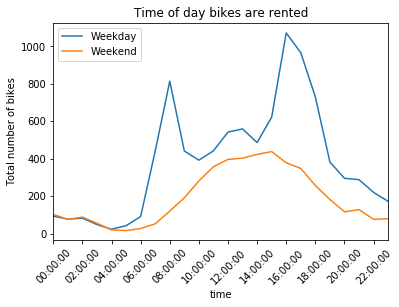

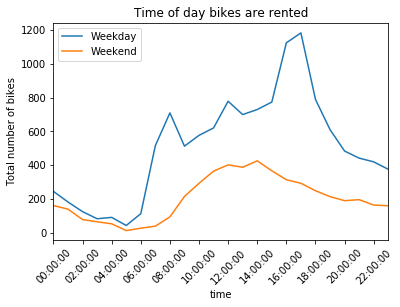

In [40]:

def cycle_data_week_split(cycledata):
    '''
    Consider the times bikes are used weekends vs weekdays
    We have written a function that calls the original cycle data of a given month in Edinburgh and splits 
    the data into weekdays and weekends and then plots the usage over time for weekends and weekdays of that month.
    '''
    #Add a column to the dataframe containing the date and time that a journey was started at 
    cycledata['started_at_day'] = cycledata['started_at']       
    cycledata['started_at_day'] =  pd.to_datetime(cycledata['started_at_day'])  
    #Convert the duplicated date/time column to the day of the week the journey was undertaken using t.weekday()
    cycledata['started_at_day'] = cycledata['started_at_day'].apply(lambda t: t.weekday())  
    #The cycle data is filtered to only contain the weekday entries. N.B. that 5 and 6 correspond to
    #saturday and sunday respectively and the '~' means to exclude these
    cycledata_weekday = cycledata[~cycledata.started_at_day.isin([5,6])]
    cycledata_weekend = cycledata[cycledata.started_at_day.isin([5,6])] #Do the same but with the weekend entries

    #Call the previously written function month_journey_begins_edinburgh on the weekend and weekday data to plot the time journeys start over time
    month_journey_begins_edinburgh([cycledata_weekday, cycledata_weekend],["Weekday", "Weekend"])  
    
    
cycle_data_week_split(cycle_data_sep)
cycle_data_week_split(cycle_data_aug)


### Weekends compared to weekdays
We can see that for weekdays there are two obvious spikes in when the journeys are beginning which are probably due to commuters travelling to and from work. Augsut is more interesting because there would have been huge numbers of tourists in the city presumably using the bikes. We can see that the August weekday graph has less obvious peaks at commuting times probably due to tourists not having jobs. The weekend plots are fairly similar for both months.

We see that if we compare the weekend and weekday bike usage between August and September that the August weekend usage has a similar pattern to the August weekend usage. This could be explained by the fact that large numbers of tourists would descend on Edinburgh for the fringe in this time. For Septmber, a time with fewer tourists we see that for the weekdays there are two obvious spikes in bike usage which is probably explained by commuters using the bikes.


Next, we consider if stations gain or lose bikes over the course of a month.

In [32]:
import numpy as np
import pandas as pd



def cycle_data_sinks(cycle_data, month):
    '''Here there is a function we have written that has input the data then outputs a map that 
    has a circle on each station with red indicating the station on aggregate loses bikes over 
    a month and blue meaning bikes are gained.'''
    
    #Count how many journeys begin and end at each station id
    end_station_count = cycle_data['end_station_id'].value_counts().sort_index()       
    start_station_count = cycle_data['start_station_id'].value_counts().sort_index()
    
    refined_cycle_data = cycle_data[['start_station_id','start_station_latitude', 'start_station_longitude']]
    #Create a dictionary that associates each start station_id with its coordinates
    id_dict = refined_cycle_data.set_index("start_station_id").T.to_dict("list") 
    
    #We have added the following check because for some months certain stations have no journeys leaving them but have
    #journeys entering them or vice versa. When finding the difference in the number of journeys 
    #entering/leaving stations we would otherwise get nan because the index would not exist.
    end_station_count_index = list(end_station_count.index)
    start_station_count_index = list(start_station_count.index)
    
    #If there is a station in which throughout the month journeys either only end there or only begin there,
    #they will not have a value in the start/end_station_count_index. 
    #In these loops we have identified these stations and appended ['station_id' - 0] to
    #the start/end_station_count where required. 
    for j in start_station_count_index:
        if j not in end_station_count_index:         
            
            app = pd.Series([0], index=[j])
            end_station_count = end_station_count.append(app)
    
    for j in end_station_count_index:
        if j not in start_station_count_index:
            app = pd.Series([0], index=[j])
            start_station_count = start_station_count.append(app)
            
    #Find the difference between the number of bikes entering and leaving each station
    diff = end_station_count-start_station_count      
    diffindex = list(diff.index)     #create a list of all of the station ids used  
    
    #This extra loop is because I got the id_dict key values from the dataframe which contained the start_station
    #and so if there are any stations in which journeys only end then their coordinates won't be in the id_key dictionary.
    #This loop will add them to this dictionary.
    for k in diffindex:
        if k not in list(id_dict.keys()):
            #Re-enter the original data input to extract the cordinates of the station which only has journeys end at it and add that to the id_dict dictionary.
            refined_cycle_data_end = cycle_data[['end_station_id','end_station_latitude', 'end_station_longitude']]   
            id_dict_end = refined_cycle_data_end.set_index("end_station_id").T.to_dict("list")
            id_dict[k] = id_dict_end[k]

            
            
    feature_group = FeatureGroup(name=month)
    
    for i in diffindex:
        rad = (abs(int(math.ceil(diff[i]/10)))) #Radius of the ring is proportional to the absolute value of the di
        if diff[i] > 0:   #Stations that gain bikes over the month have a blue ring
            folium.CircleMarker(
                    location=id_dict[i], #location has been extracted from id_dict
                    radius=rad,
                    color='blue',
                    fill=True,
                    fill_color='blue'
                ).add_to(feature_group)
        if diff[i] < 0:    #Stations that lose bikes have ared ring       
                folium.CircleMarker(
                    location=id_dict[i], #location has been extracted from id_dict
                    radius=rad,
                    color='red',
                    fill=True,
                    fill_color='red'
                ).add_to(feature_group)
    
    return feature_group
#Finally call the function over the four months we are considering.
m = newmap()

cycle_data_sinks(cycle_data_jun, "June").add_to(m)
cycle_data_sinks(cycle_data_jul, "July").add_to(m)
cycle_data_sinks(cycle_data_aug, "August").add_to(m)
cycle_data_sinks(cycle_data_sep, "September").add_to(m)

LayerControl().add_to(m)
m

C:\Users\s1997003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  app.launch_new_instance()
C:\Users\s1997003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  app.launch_new_instance()
C:\Users\s1997003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  app.launch_new_instance()


### Difference in bikes rented from and returned to stations

Perhaps predictably, we see that the bike stations at the top of the hills will over time lose bikes to the stations at the bottom of the hill. We see especially that places like the bottom of Leith Walk and New Town gain lots of bikes. This would be something to consider if someone was implementing a cycle scheme such as this. It would be expensive and time consuming to be constantly moving bikes around the city to maintain an equilibrium.